In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as nplin
import itertools

In [2]:
np.random.seed(0)

In [3]:
MSE = np.loadtxt('MSE_l5k.txt')
KL = np.loadtxt('KL_l5k.txt')
E_av = np.loadtxt('E_av_l5k.txt')

In [4]:
MSE2 = np.loadtxt('MSE_l10k.txt')
KL2 = np.loadtxt('KL_l10k.txt')
E_av2 = np.loadtxt('E_av_l10k.txt')

In [5]:
E_av = -E_av
#E_av2 = -E_av2

In [6]:
eps_list = np.linspace(0,1.0,11)
n_eps = len(eps_list)

MSE_eps = np.zeros(n_eps)
KL_eps = np.zeros(n_eps)
E_eps = np.zeros(n_eps)
for i in range(n_eps):
    it = np.argmin(KL[i,:])
    MSE_eps[i] = MSE[i,it]
    KL_eps[i] = KL[i,it]
    E_eps[i] = E_av[i,:].min()

In [7]:
MSE2_eps = np.zeros(n_eps)
KL2_eps = np.zeros(n_eps)
E2_eps = np.zeros(n_eps)
for i in range(n_eps):
    it = np.argmin(KL2[i,:])
    MSE2_eps[i] = MSE2[i,it]
    KL2_eps[i] = KL2[i,it]
    E2_eps[i] = E_av2[i,:].min()

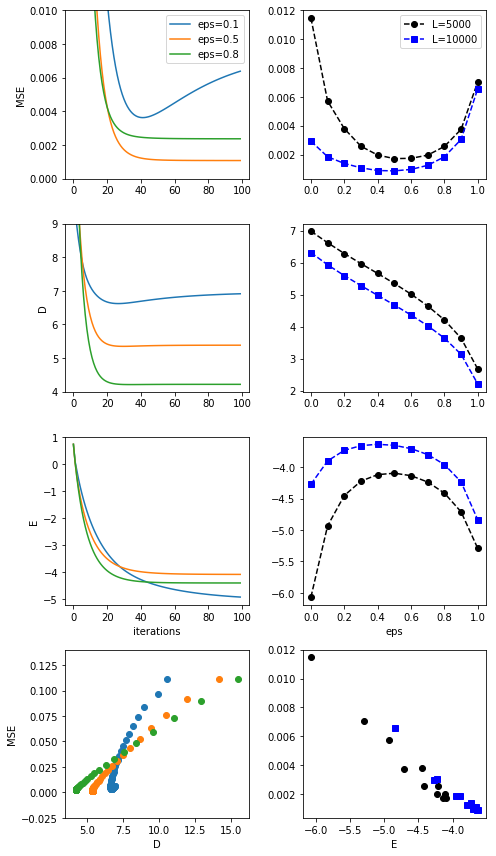

In [13]:
ieps_show = [1,5,8]

nx,ny = 2,4
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*3))

for i in ieps_show:
    ax[0,0].plot(MSE[i],label='eps=%s'%eps_list[i])
    ax[1,0].plot(KL[i],label='eps=%s'%eps_list[i])
    ax[2,0].plot(E_av[i],label='eps=%s'%eps_list[i])
    ax[3,0].scatter(KL[i],MSE[i],label='eps=%s'%eps_list[i])

#    ax[0,0].plot(MSE[i],label='eps=%s'%eps_list[i])
#    ax[1,0].plot(KL[i],label='eps=%s'%eps_list[i])
#    ax[2,0].plot(E_av[i],label='eps=%s'%eps_list[i])
#    ax[3,0].scatter(KL[i],MSE[i],label='eps=%s'%eps_list[i])


ax[0,1].plot(eps_list[:],MSE_eps[:],'ko--',label='L=5000')
ax[1,1].plot(eps_list[:],KL_eps[:],'ko--')
ax[2,1].plot(eps_list[:],E_eps[:],'ko--')
ax[3,1].plot(E_eps,MSE_eps,'ko')

ax[0,1].plot(eps_list[:],MSE2_eps[:],'bs--',label='L=10000')
ax[1,1].plot(eps_list[:],KL2_eps[:],'bs--')
ax[2,1].plot(eps_list[:],E2_eps[:],'bs--')
ax[3,1].plot(E2_eps,MSE2_eps,'bs')

ax[0,0].set_ylim([0,0.01])
ax[1,0].set_ylim([4,9])


ax[0,0].set_ylabel('MSE')
ax[1,0].set_ylabel('D')
ax[2,0].set_ylabel('E')
ax[3,0].set_ylabel('MSE')
ax[2,0].set_xlabel('iterations')
ax[3,0].set_xlabel('D')
ax[2,1].set_xlabel('eps')
ax[3,1].set_xlabel('E')

#ax[3,1].set_ylim([0,0.008])

ax[0,0].legend()
ax[0,1].legend()

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.savefig('fig1.pdf', format='pdf', dpi=100)